<a href="https://colab.research.google.com/github/jgesc-05/clase-inteligencia-artificial/blob/main/Clase11_03_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cuadernos 6 y 7

##La selección de baja varianza: eliminar las columnas con poca varianza, porque no aportan mucho al modelo. Donde se vea X mayuscula son features

##Se separan X y y (2 dataframes; X tiene los features y Y la label)

Con el SMOTE se pueden balancear datos no balanceados, porque puede haber oversampling o undersampling con KNN, lo que balancea la muestra.

Cuando hay DEMASIADA diferencia entre los datos, no conviene balancear los datos, sino toca conseguir más datos reales (ej: más datos reales, no sintéticos)

Es importante la estratificación, porque en la división de datos de prueba y entrenamiento no debe haber datos de solo una categoría deseada (ej: solo de diabéticos en un modelo de predicción de diabetes o no)

Debe tener una precisión del 80%, para que sea aceptable, no se acepta el overfitting (sobreajuste)

#Ejercicio de clase (cuaderno 6)
**Importación del dataset de diabetes**

In [1]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download latest version
path = kagglehub.dataset_download("akshaydattatraykhare/diabetes-dataset")

print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 2.54MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/akshaydattatraykhare/diabetes-dataset/versions/1


In [2]:
df = pd.read_csv(path + "/diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
#Voy a balancear los datos de df usando la columna outcome, con SMOTE, con oversampling

from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(df.drop("Outcome", axis=1), df.Outcome)

#Separación de features y label

In [4]:
X = df.drop("Outcome", axis=1)
y = df.Outcome

In [5]:
#Normalización MinMax de features del df X

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X = pd.DataFrame(X, columns=df.columns[:-1])
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [6]:
X.describe()
#ES NECESARIA LA NORMALIZACION DE DATOS

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Uso de VarianceThreshold pare eliminar features para eliminar varianzas más bajas, menores a 0.1

from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.02)
X_clean = selector.fit_transform(X)
X_clean

array([[0.35294118, 0.74371859, 0.59016393, 0.35353535, 0.48333333],
       [0.05882353, 0.42713568, 0.54098361, 0.29292929, 0.16666667],
       [0.47058824, 0.91959799, 0.52459016, 0.        , 0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, 0.23232323, 0.15      ],
       [0.05882353, 0.63316583, 0.49180328, 0.        , 0.43333333],
       [0.05882353, 0.46733668, 0.57377049, 0.31313131, 0.03333333]])

In [8]:
print(selector.get_feature_names_out())

['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Age']


In [9]:
X_clean = pd.DataFrame(X_clean, columns=selector.get_feature_names_out())
X_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age
0,0.352941,0.743719,0.590164,0.353535,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.200000
...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.433333


#Partición de datos de prueba y entrenamiento
**Ya se tiene la vista minable para esto**

In [13]:
from sklearn.model_selection import train_test_split


In [11]:
X_clean.shape

(768, 5)

In [14]:
# prompt: Esmotea los datos para que queden balanceados

# ... (previous code)

# Balanceo de datos con SMOTE
smote = SMOTE(random_state=42) # Se agrega random_state para reproducibilidad
X_smote, y_smote = smote.fit_resample(X, y) # Se usa X e y originales, ya escalados

# Convertir de nuevo a DataFrame
X_smote = pd.DataFrame(X_smote, columns=X.columns)

# Verificar el balanceo
print(y_smote.value_counts())

# Partición de datos de prueba y entrenamiento con los datos balanceados
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# ... (rest of the code)


Outcome
1    500
0    500
Name: count, dtype: int64


<Axes: xlabel='Outcome', ylabel='count'>

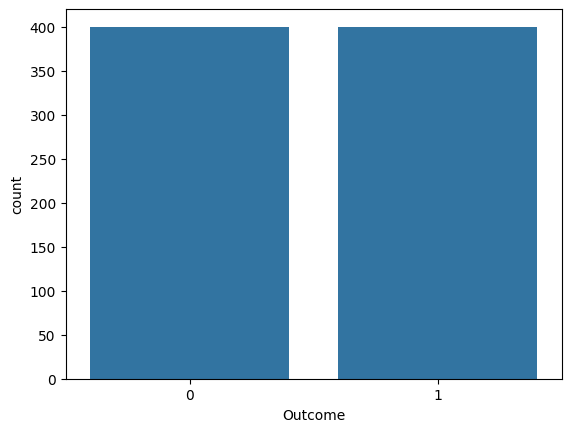

In [15]:
sns.countplot(x=y_train)

In [17]:
X_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age
0,0.352941,0.743719,0.590164,0.353535,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.200000
...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.433333
